# HPC Architecture

Understanding how to parallelize software requires first having a high-level understanding of the design of the physical machines that run the software.

The image below shows a rough overview of some of the elements of a typical supercomputer.

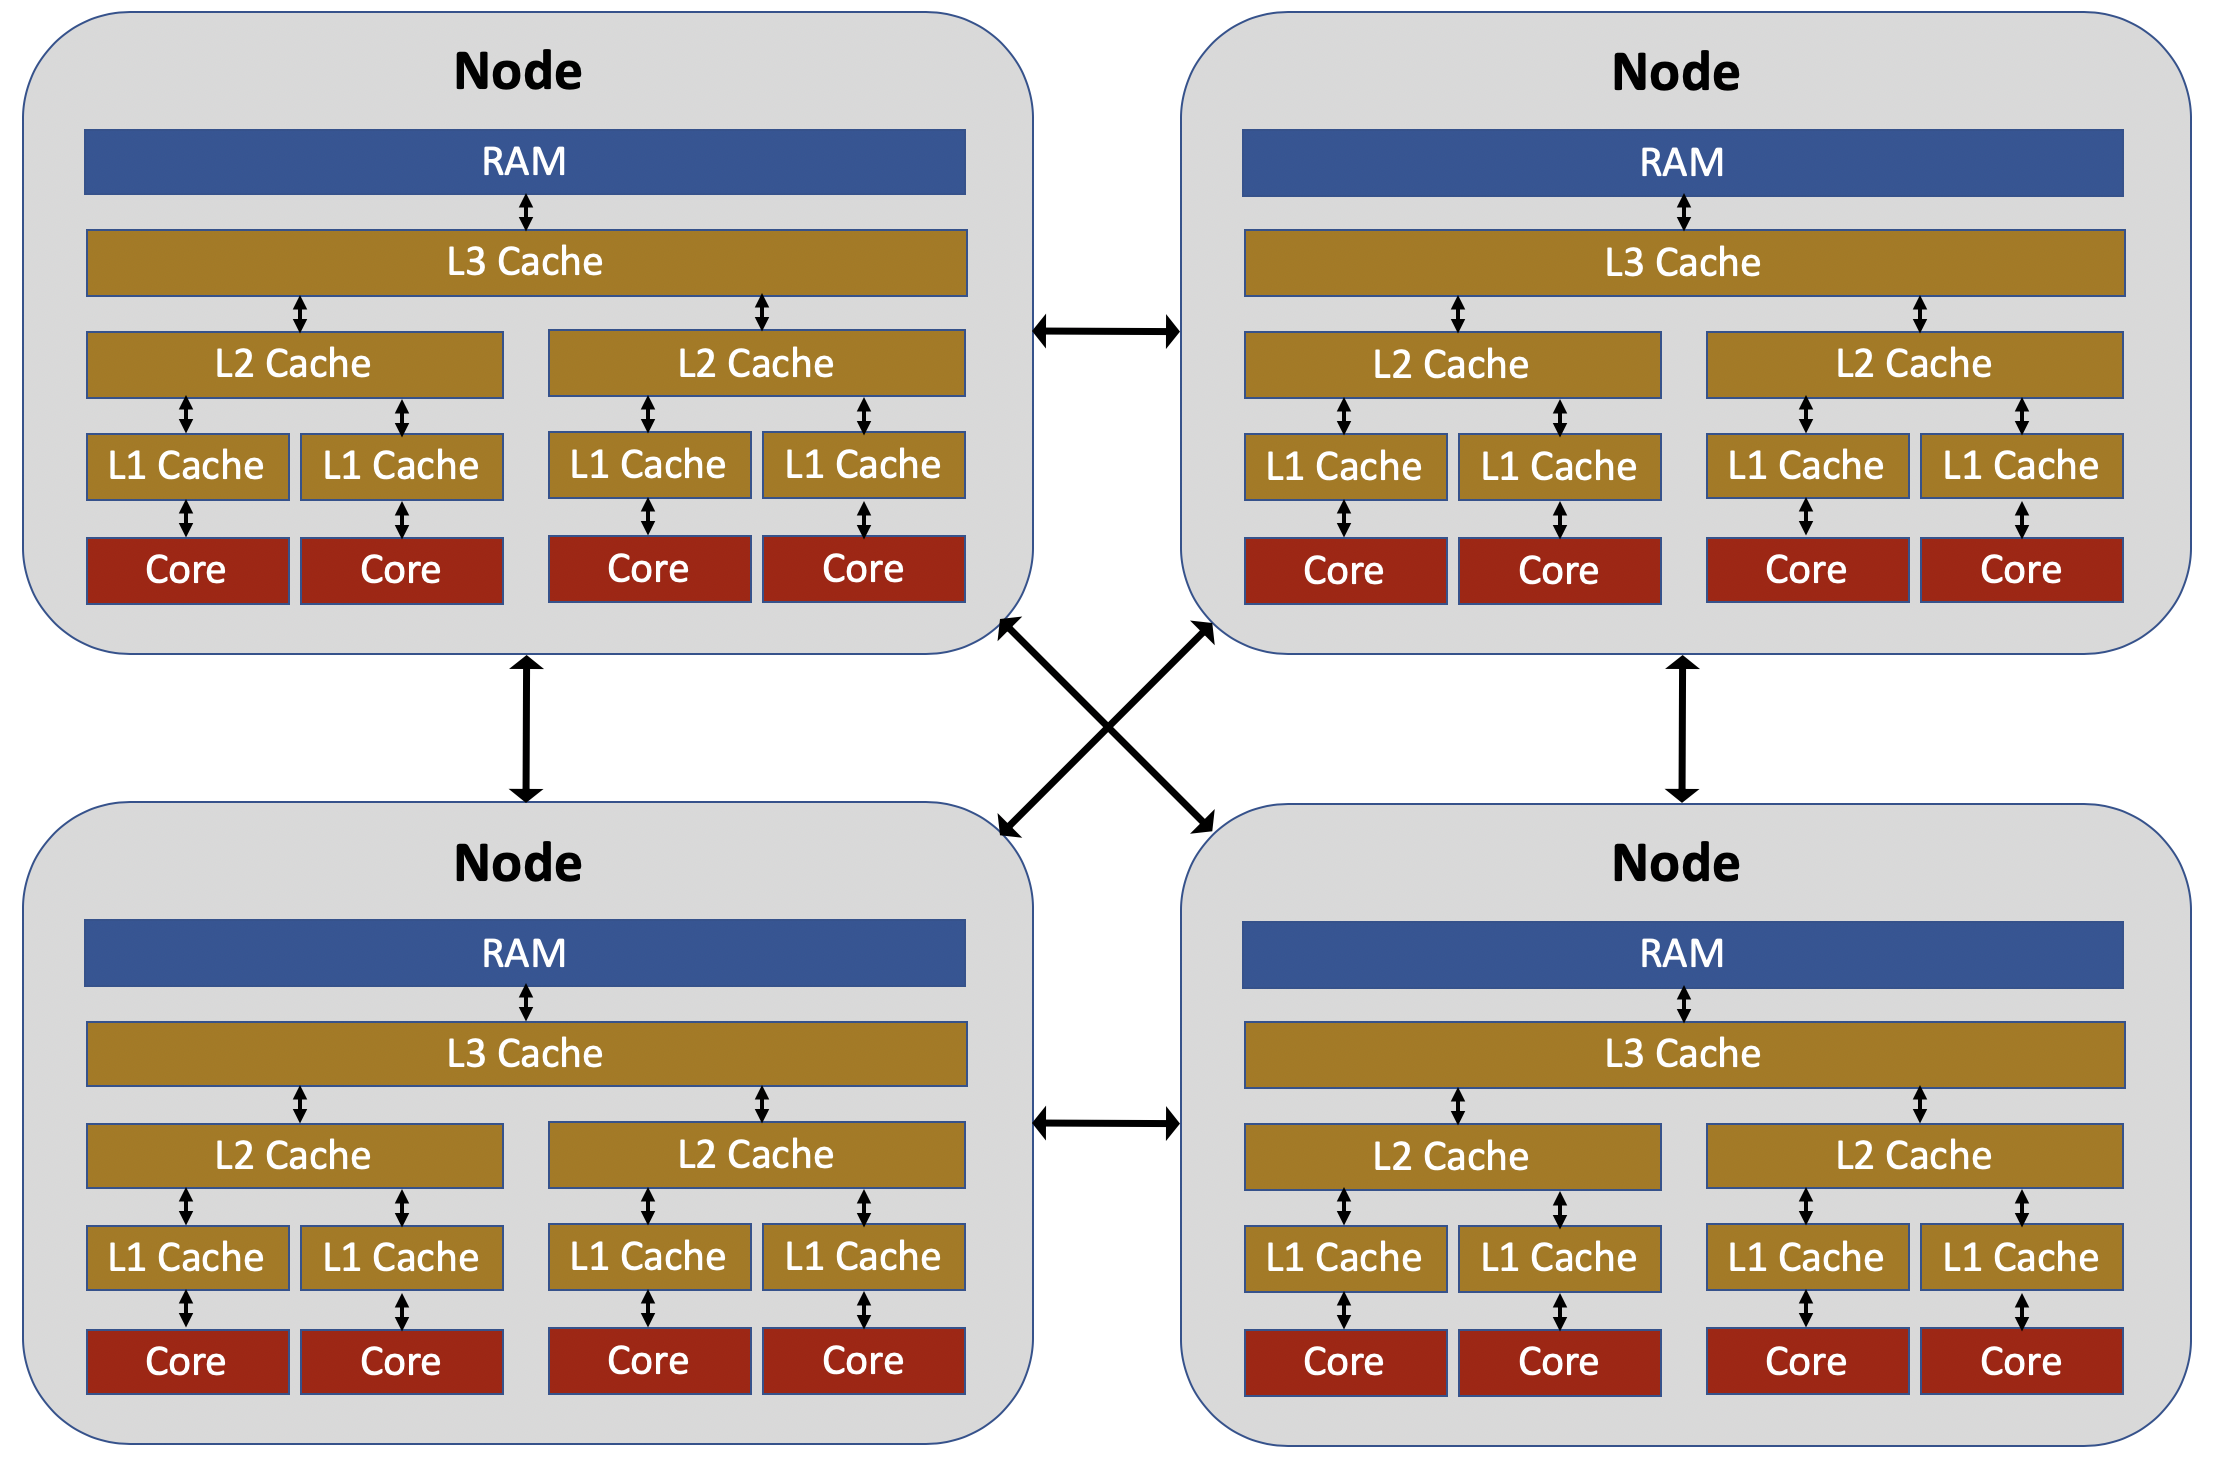



- The supercomputer consists of a large number of nodes. Only four nodes are shown in the picture, but modern supercomputers can have thousands of nodes that are interconnected in a large “cluster.”



- In some respects, we can think of each node as an independent computer, connected to many other computers within a local network.



- Each node has a group of “cores,” which are the microprocessors responsible for doing computational work.



- In the earlier days of computing, all CPUs had a single core; today, nearly all CPUs are multi-core, including those used in desktops and laptops.

## Cedia cluster:

CEDIA provides HPC services in Ecuador, see the documentation below:

https://www.cedia.edu.ec/infraestructura/supercomputador


To use it:

1. First you need to apply for an account (see lecture 507).


2. Then, you can log into the cluster using SSH:

```
    ssh -XY -i ~/.ssh/your_cedia_publickey wladimir.banda@hpc.cedia.edu.ec
```

The option **-XY** is for accessing graphics. 


3. Now, we will use SLURM commands to see what is available:

#### a) sinfo:

```
[wladimir.banda@login1 ~]$ sinfo
PARTITION AVAIL  TIMELIMIT  NODES  STATE NODELIST
batch        up   infinite      1    mix dgx-node-0-1
mig*         up   infinite      1    mix dgx-node-0-0
cpu-dev      up 5-00:00:00      2    mix dgx-node-0-[0-1]
cpu          up 2-00:00:00      2    mix dgx-node-0-[0-1]
cpu-max      up 1-00:00:00      2    mix dgx-node-0-[0-1]
gpu-dev      up 4-00:00:00      2    mix dgx-node-0-[0-1]
gpu          up 2-00:00:00      2    mix dgx-node-0-[0-1]
gpu-max      up 1-00:00:00      2    mix dgx-node-0-[0-1]
```

#### b) scontrol show partition:

```
[wladimir.banda@login1 ~]$ scontrol show partition
PartitionName=batch
   AllowGroups=ALL AllowAccounts=batch_group AllowQos=ALL
   AllocNodes=ALL Default=NO QoS=N/A
   DefaultTime=NONE DisableRootJobs=NO ExclusiveUser=NO GraceTime=0 Hidden=NO
   MaxNodes=UNLIMITED MaxTime=UNLIMITED MinNodes=0 LLN=NO MaxCPUsPerNode=UNLIMITED
   Nodes=dgx-node-0-1
   PriorityJobFactor=1 PriorityTier=1 RootOnly=NO ReqResv=NO OverSubscribe=NO
   OverTimeLimit=NONE PreemptMode=OFF
   State=UP TotalCPUs=256 TotalNodes=1 SelectTypeParameters=NONE
   JobDefaults=(null)
   DefMemPerCPU=3824 MaxMemPerNode=UNLIMITED
   TRES=cpu=256,mem=980288M,node=1,billing=256,gres/gpu=8,gres/gpu:a100-sxm4-40gb=8
```

#### c) squeue:

```
[wladimir.banda@login1 ~]$ squeue
             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
              8572     batch no-shell patricia  R 49-21:44:28      1 dgx-node-0-1
             10569       cpu interact henry.ma  R    1:16:06      1 dgx-node-0-1
             10568   cpu-max sys/dash paul.bra  R    1:22:46      1 dgx-node-0-0
             10549       gpu no-shell krishna.  R 1-10:22:24      1 dgx-node-0-0
             10566       gpu interact bonny.ba  R    3:20:27      1 dgx-node-0-0
             10440   gpu-dev no-shell carlos.m  R 3-00:09:24      1 dgx-node-0-0
             10546   gpu-dev sys/dash osvaldo.  R 1-14:52:03      1 dgx-node-0-0
             10561   gpu-dev sys/dash osvaldo.  R   18:22:55      1 dgx-node-0-0
```

#### d) squeue -u $USER

```
[wladimir.banda@login1 ~]$ squeue -u $USER
             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
```

#### e) salloc (interactive jobs)

```
salloc -p cpu -n 1 --mem=1G
```


This reserves 1 node and 1GB of memory:

```
[wladimir.banda@login1 ~]$ salloc -p cpu -n 1 --mem=1G
salloc: Granted job allocation 10570
salloc: Waiting for resource configuration
salloc: Nodes dgx-node-0-0 are ready for job
[wladimir.banda@login1 ~]$ 
```

#### f) SSH into compute node:

```
ssh dgx-node-0-0
```


#### g) Check again:

```
wladimir.banda@dgx-node-0-0:~$ squeue -u $USER
             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
             10570       cpu interact wladimir  R       3:32      1 dgx-node-0-0
```

#### h) Use scp to transfer files:

```
scp -i ~/.ssh/id_rsa_oldcedia example_mpi10.py wladimir.banda@hpc.cedia.edu.ec:/home/wladimir.banda/.
```


# Miniconda:

On the CEDIA and Imbabura clusters, like in most HPC clusters, we do not have **root access**.

Miniconda is a reduced version of Anaconda, which provides a platform independent python environment that is easily configured with **python** and **pip** support without the need of root user.

From miniconda website: https://conda.io/docs/user-guide/install/index.html

We do not need administrative or root permissions to install Anaconda if we select a user-writable install location.


#### Reference:
https://github.com/jimsmith/miniconda2


### 1. Log into CEDIA using your username, key, and password.

```
ssh -XY -i ~/.ssh/id_rsa_HPCcedia wladimir.banda@hpc.cedia.edu.ec
```

### 2. Once there, get into your home directory and create directory

```
cd ~
pwd
mkdir -p miniconda && cd miniconda
```

### 3. Copy and paste this to download and install miniconda into that directory

```
MINICONDA_VERSION=latest
wget https://repo.continuum.io/miniconda/Miniconda2-${MINICONDA_VERSION}-Linux-x86_64.sh \
&& chmod 755 Miniconda2-${MINICONDA_VERSION}-Linux-x86_64.sh \
&& ./Miniconda2-${MINICONDA_VERSION}-Linux-x86_64.sh -b -p ~/miniconda2
```

### 4. Download the default condarc and autoswitching (when entering a directory)

```
wget https://raw.githubusercontent.com/jimsmith/miniconda/master/.condarc -O ~/.condarc \
&& wget https://raw.githubusercontent.com/jimsmith/miniconda/master/conda_auto_env.sh -O ~/conda_auto_env.sh \
&& chmod 755 ~/conda_auto_env.sh
```

### 5. Update your .bashrc and check with cat if the lines have been added:

```
cat <<EOF >>~/.bashrc
#
# 01/03/2018 - added Minicoda2 path
export PATH=~/miniconda2/bin:$PATH
#
# 01/03/2018 - added conda autoswitching
source ~/conda_auto_env.sh
EOF
```

### 6. Activate without logging out
```
source ~/.bashrc
```

### 7. Update conda to latest version
```
which conda
conda update conda
```

### 8. Setup autoswitching
```
mkdir -p ~/miniconda/awscli/ \
&& cd ~/miniconda/awscli/ \
&& wget https://raw.githubusercontent.com/jimsmith/miniconda/master/environment.yml
```

If you experience message of `-bash: PROMPT_COMMAND: readonly variable` then check that this is not been set elsewhere for example in `/etc/bashrc`


### 9. Now create my miniconda environment with Python 3.7 for the python interpreter
```
conda create --yes --quiet --name awscli python=3.7 pip
```

Tip: to activate the environment manually:

```
    source activate awscli
```

Check python:

```
    [wladimir.banda@login1 ~]$ python --version
    Python 3.7.16
    
    [wladimir.banda@login1 ~]$ which python
    ~/Workspace/.conda/envs/py37/bin/python
```

All is good, now we set up the environment using **pip**.

### 10. Next install the python packages that you usually need using pip
 
```
    (awscli) [wladimir.banda@login1 ~]$ pip install numpy
    (awscli) [wladimir.banda@login1 ~]$ pip install matplotlib
```

### 11. Check if all went well:

```
    [wladimir.banda@login1 ~]$ python
    Python 3.7.16 (default, Jan 17 2023, 22:20:44) 
    [GCC 11.2.0] :: Anaconda, Inc. on linux
    Type "help", "copyright", "credits" or "license" for more information.
    >>> import numpy
    >>> import matplotlib
    >>> exit()
```

Congratulations, you have successfully installed Conda on the cluster.